### Red Wine Quality prediction using ML

Problem_statment: 


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [1]:
#Loading some neccessary libs here

import pandas  as pd
import matplotlib.pyplot as  plt
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset here 
wine_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#checking the cols
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine_data.columns.value_counts().sum()
# so including our label col we have total 11 as our independent cols and the quaity col as our output col

12

Checking for the Null values in the Dataset


In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

so it can be observed that the dataset has no Na values present in the columns

#### Using the heatmap for checking the NA_vals

<AxesSubplot:>

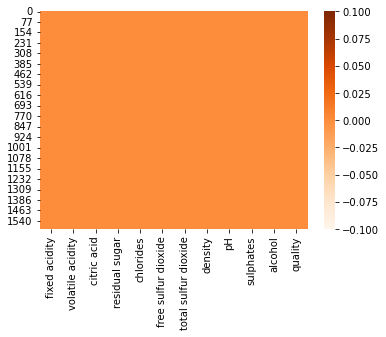

In [6]:
sns.heatmap(wine_data.isnull(), cmap='Oranges')

so no null values here

#### Exploration of the Dataset (EDA)

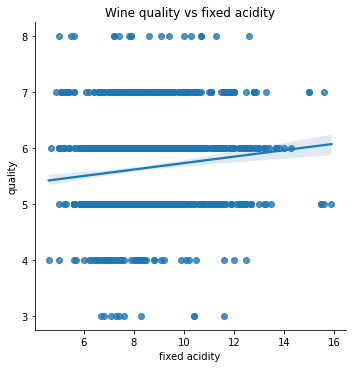

In [7]:
#Bivariate Analysis
sns.lmplot(x ='fixed acidity',  y='quality', data =wine_data)
plt.title('Wine quality vs fixed acidity')
plt.show()

so we can see that the fixed acidity level is moving up the wine quality has also increasing

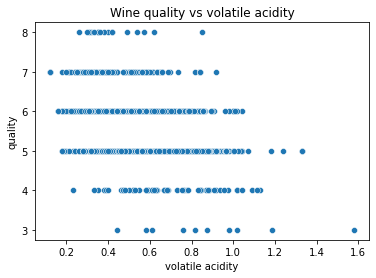

In [8]:
sns.scatterplot(x='volatile acidity',  y='quality', data=wine_data, palette='Set1', sizes=8)
plt.title('Wine quality vs volatile acidity')
plt.show()

As we can see that as the volatile acidity is increasing the wine quality is degrading

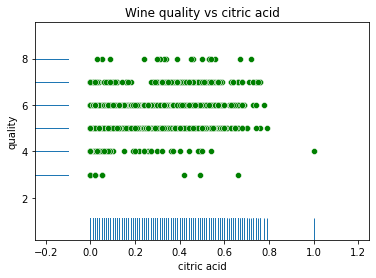

In [9]:
sns.scatterplot(data=wine_data, x="citric acid", y="quality", color='green')
sns.rugplot(data=wine_data ,x="citric acid", y="quality", height =.1)
plt.title('Wine quality vs citric acid')
plt.show()

as the citric acid values is increasing the Wine quality is being increased

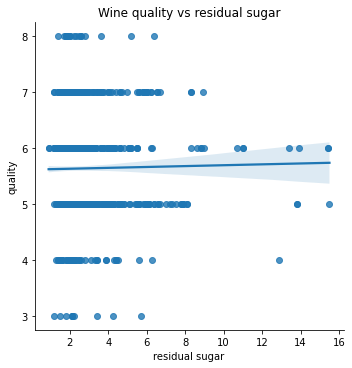

In [10]:
sns.lmplot(data=wine_data, x='residual sugar', y='quality')
plt.title('Wine quality vs residual sugar')
plt.show()

As we can see that as the residual sugar values was max the wine quality was not good there thus increase in the residual sugar is making the wine quality bad

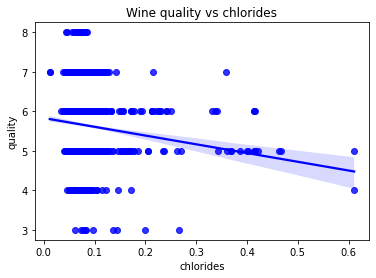

In [11]:
sns.regplot(data=wine_data, x='chlorides', y='quality',color='blue')
plt.title('Wine quality vs chlorides')
plt.show()

As we can see that the increase in the content of chlorides in the wine the wine quality is degrading

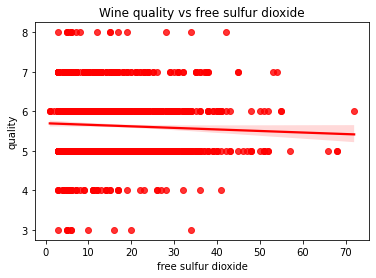

In [12]:
sns.regplot(data=wine_data, x='free sulfur dioxide', y='quality',color='red')
plt.title('Wine quality vs free sulfur dioxide')
plt.show()

As we can see that at the higest sulfur dioxide level the wine quality is degraded

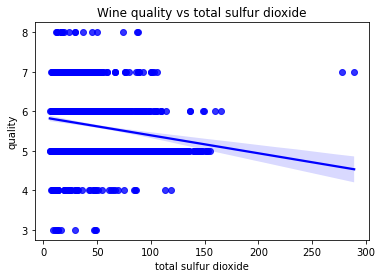

In [13]:
sns.regplot(data=wine_data, x='total sulfur dioxide', y='quality',color='blue')
plt.title('Wine quality vs total sulfur dioxide')
plt.show()

intially total sulfur dioxide when increasing the quality is also increased till 6 but after touching the 150 range of total sulfur dioxide content the quality increased when the amt was less

<AxesSubplot:xlabel='density'>

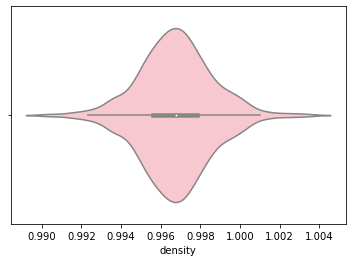

In [14]:
sns.violinplot(data=wine_data, x='density', color='pink')

As we can see that the at 0.996 and 0.998 we have the max density and at 0.990 and 1.004 we have min density

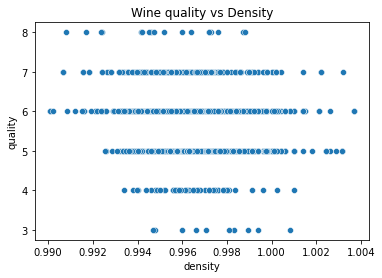

In [15]:
sns.scatterplot(data=wine_data, x='density', y='quality')
plt.title('Wine quality vs Density')
plt.show()

so we can see that the between the density of 0.994 to 1.000 the wine quality is being increased to a great extent

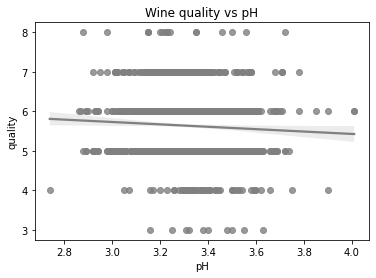

In [16]:
sns.regplot(data=wine_data, x='pH', y='quality',color='grey')
plt.title('Wine quality vs pH')
plt.show()

So we can see that as the gradual increase in the pH -level the wine quality is also being increased with it.

<AxesSubplot:xlabel='pH', ylabel='Density'>

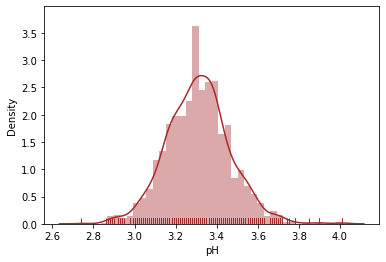

In [17]:
sns.distplot(wine_data['pH'],rug=True, color ='brown')

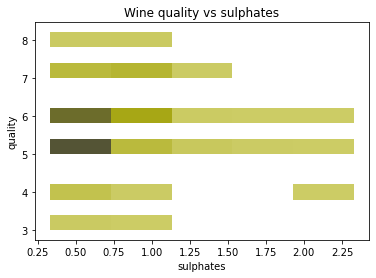

In [18]:
sns.histplot(data=wine_data, x='sulphates', y='quality',color='olive', fill=True, binwidth=0.4)
plt.title('Wine quality vs sulphates')
plt.show()

basically we can see that if the sulphahtes quantity is less in the red wine mixture then the quality of the wine remains very good .

<AxesSubplot:xlabel='sulphates'>

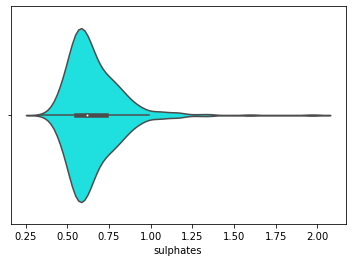

In [19]:
sns.violinplot(wine_data['sulphates'], color ='cyan')

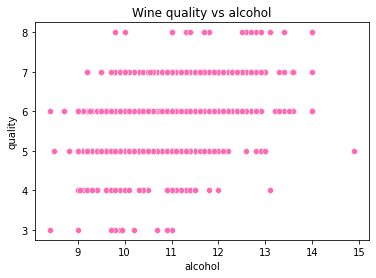

In [20]:
sns.scatterplot(data=wine_data, x='alcohol', y='quality',color='hotpink')
plt.title('Wine quality vs alcohol')
plt.show()

so as the Alchol content in wine is increased the quality is being increased

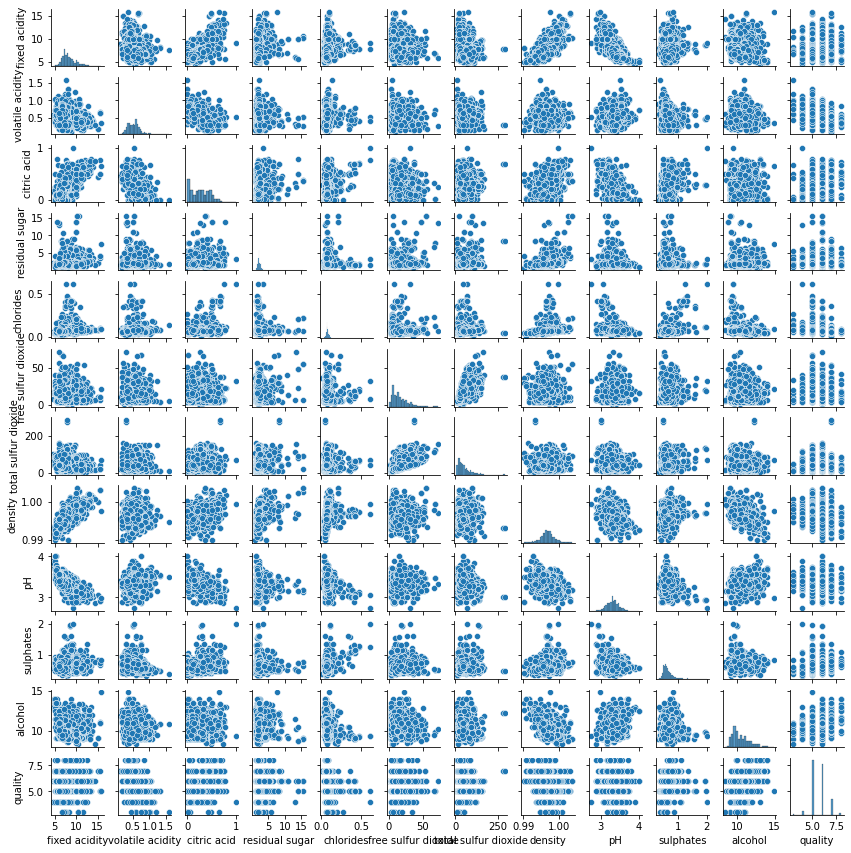

In [21]:
sns.pairplot(data=wine_data,size=1)

#### Correlation Analysis

In [22]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [23]:
wine_data.cov().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900


<AxesSubplot:>

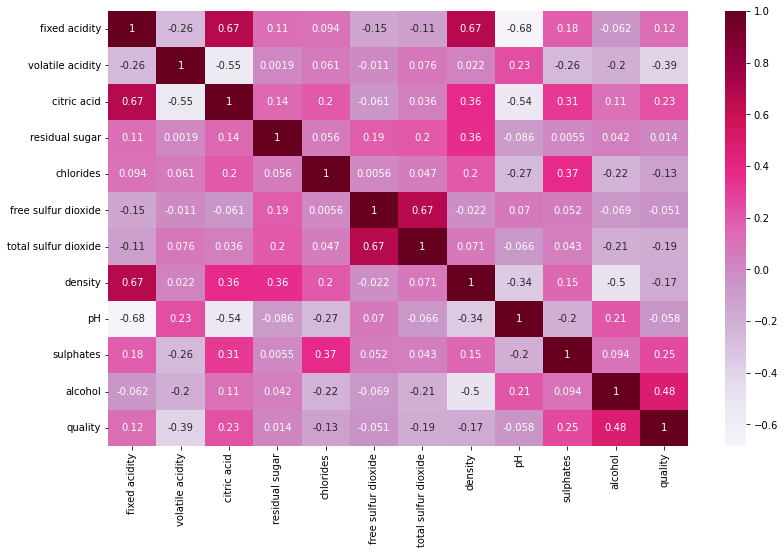

In [24]:
plt.figure(figsize = (13,8))
sns.heatmap(wine_data.corr(), annot =True, cmap='PuRd')

Observations from the Correlation:


1- fixed acidity is realated 12% to quality.

2- volatile acidity is related -39% to the quality.

3- citric acid is 23% related to the quality.

4- residual sugar is 1.4 % related to the quality.

5- chlorides is -13% related to the quality 6 free sulphur dixoide is-5.1% related to the quality.

6- total sulfur dixoxide is -19% related to the quality 8 . density is -17% related to the quality.

7- pH is 5.8% related to the quality

8- sulphates is 25% related to the quality.

9- alchol is 48% related to the quality.

#### Covariance analysis

<AxesSubplot:>

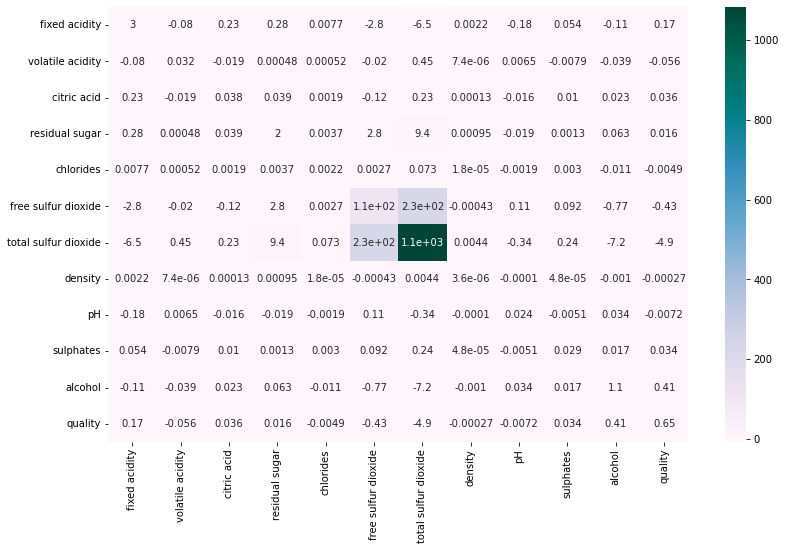

In [25]:
plt.figure(figsize = (13,8))
sns.heatmap(wine_data.cov(), annot =True, cmap='PuBuGn')

#### Statistical description of the Data

In [26]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


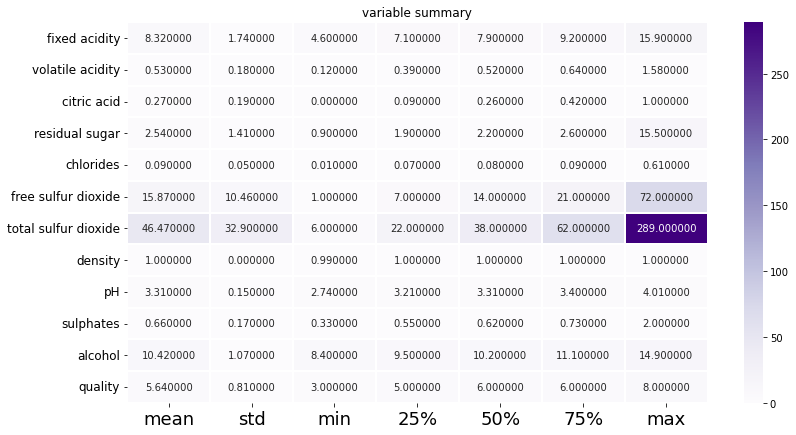

In [27]:
plt.figure(figsize=(13,7))
sns.heatmap(round(wine_data.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True,cmap='Purples')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable summary')
plt.show()

In [28]:
#checkling the datatypes here
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### checking for outliers

<AxesSubplot:xlabel='alcohol'>

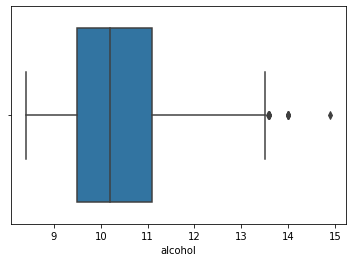

In [29]:
sns.boxplot(wine_data.alcohol, orient='h')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

<Figure size 720x648 with 0 Axes>

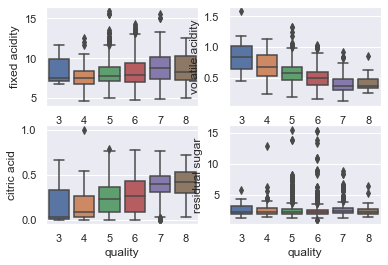

In [30]:
sns.set()
plt.figure(figsize=(10,9))

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=wine_data, x='quality', y='fixed acidity', ax=axes[0,0])
sns.boxplot(data=wine_data, x='quality', y='volatile acidity', ax=axes[0,1])
sns.boxplot(data=wine_data, x='quality', y='citric acid', ax=axes[1,0])
sns.boxplot(data=wine_data, x='quality', y='residual sugar', ax=axes[1,1])

<AxesSubplot:xlabel='quality', ylabel='density'>

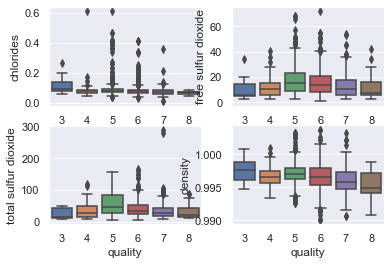

<Figure size 2880x1512 with 0 Axes>

In [31]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)
plt.figure(figsize=(40,21))

#create boxplot in each subplot
sns.boxplot(data=wine_data, x='quality', y='chlorides', ax=axes[0,0])
sns.boxplot(data=wine_data, x='quality', y='free sulfur dioxide', ax=axes[0,1])
sns.boxplot(data=wine_data, x='quality', y='total sulfur dioxide', ax=axes[1,0])
sns.boxplot(data=wine_data, x='quality', y='density', ax=axes[1,1])

so we can say that alchol has some outliers present in it



<AxesSubplot:xlabel='quality', ylabel='alcohol'>

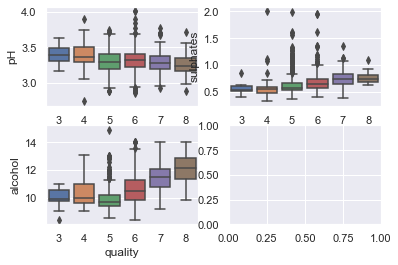

<Figure size 2880x1512 with 0 Axes>

In [32]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2,2)
plt.figure(figsize=(40,21))

#create boxplot in each subplot
sns.boxplot(data=wine_data, x='quality', y='pH', ax=axes[0,0])
sns.boxplot(data=wine_data, x='quality', y='sulphates', ax=axes[0,1])
sns.boxplot(data=wine_data, x='quality', y='alcohol', ax=axes[1,0])

So it can seen that all the columns has some less or more outliers in it whcih has to be removed for better model accuracy


#### Checking for the Skewness in the Dataset

In [33]:
wine_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### Graph representation of the skewed columns

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

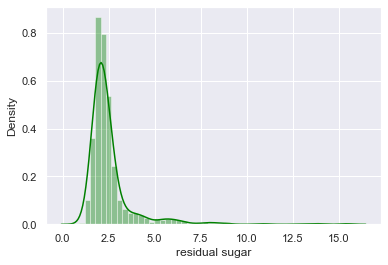

In [34]:
sns.distplot(wine_data['residual sugar'], vertical=False, color='green')

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

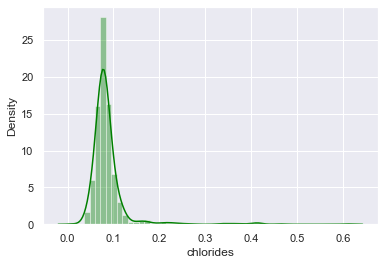

In [35]:
sns.distplot(wine_data['chlorides'], vertical=False, color='green')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

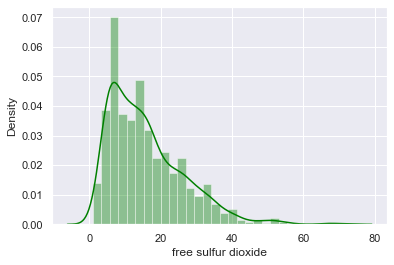

In [36]:
sns.distplot(wine_data['free sulfur dioxide'], vertical=False, color='green')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

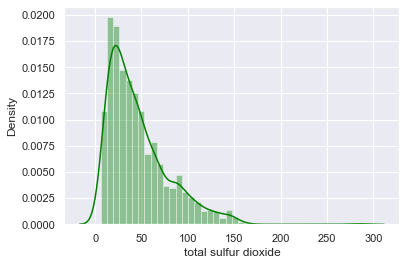

In [37]:
sns.distplot(wine_data['total sulfur dioxide'], vertical=False, color='green')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

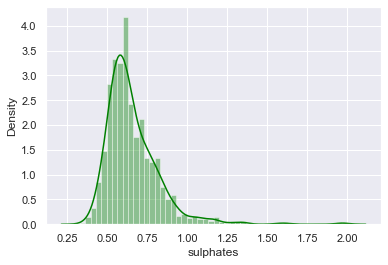

In [38]:
sns.distplot(wine_data['sulphates'], vertical=False, color='green')

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

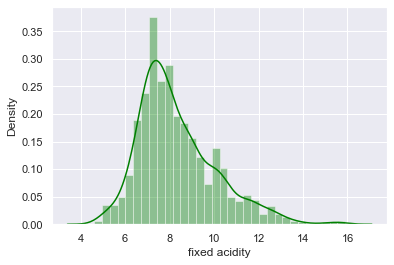

In [39]:
sns.distplot(wine_data['fixed acidity'], vertical=False, color='green')

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

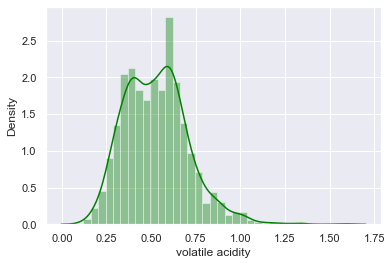

In [40]:
sns.distplot(wine_data['volatile acidity'], vertical=False, color='green')

The curve here shows that the Data present in the columns does not follows the normal distributions thus it is a skewed data cols

#### Data cleaning and preprocessing

In [41]:
wine_data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

#### Outliers removal with Scipy

In [42]:
import scipy 
from scipy.stats import zscore
import numpy as np

In [43]:
z= np.abs(zscore(wine_data))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [44]:
len(np.where(z>3)[0])
z.iloc[1017]

fixed acidity           0.183641
volatile acidity        1.943091
citric acid             0.508495
residual sugar          1.162696
chlorides               0.817557
free sulfur dioxide     1.924577
total sulfur dioxide    1.901540
density                 3.538731
pH                      2.728510
sulphates               1.287363
alcohol                 2.137373
quality                 0.450848
Name: 1017, dtype: float64

thus by changing the array index here we can know that which can column consists of outliers as 1017 row

In [45]:
wine_new= wine_data[(z<3).all(axis=1)]

In [46]:
wine_new.shape
print(wine_new.shape,'This is the new df')

(1451, 12) This is the new df


In [47]:
wine_data.shape
print(wine_data.shape,'This is the old Df')

(1599, 12) This is the old Df


#### Percentage of Data-loss

In [48]:
loss_percentage = (1599-1451)/1599*100
print(loss_percentage,'%')

9.255784865540964 %


In [49]:
print('total_dropped_rows', wine_data.shape[0]-wine_new.shape[0])

total_dropped_rows 148


In [50]:
#wine_new.drop('c-log', axis=1, inplace=True)

In [51]:
x=wine_new.drop(['quality'],axis=1)
y = wine_new.iloc[:,-1]

#### Transforming the Data to remove skewness:

In [52]:
#setting the threshold limit as 3 accordance to the emprical rule  
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [53]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')

In [54]:
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [55]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [56]:
pd.DataFrame(x).skew()

0     0.018666
1     0.004945
2     0.018049
3    -0.004606
4    -0.114658
5    -0.021455
6    -0.005813
7    -0.001043
8    -0.000074
9     0.020799
10    0.114658
dtype: float64

so now we can see that the skewness from the Dataset has been removed

#### plotting the normal distribution curves

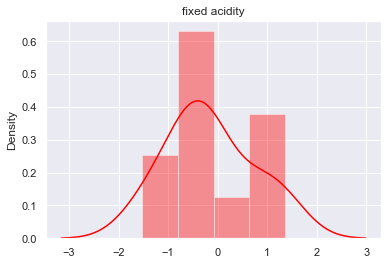

In [57]:
sns.distplot(x[0], color='red')
plt.title("fixed acidity")
plt.show()

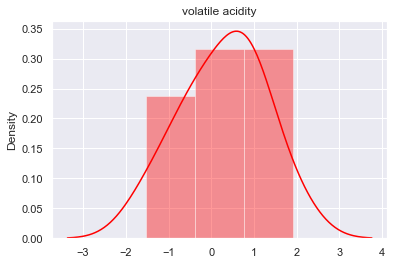

In [58]:
sns.distplot(x[1], color='red')
plt.title("volatile acidity")
plt.show()

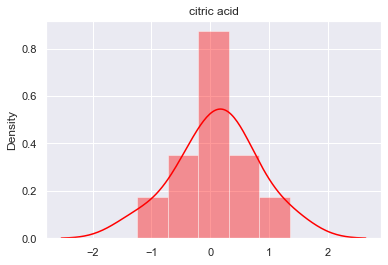

In [59]:
sns.distplot(x[2], color='red')
plt.title("citric acid")
plt.show()

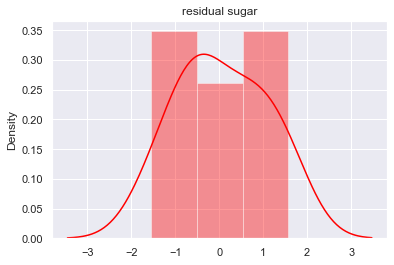

In [60]:
sns.distplot(x[3], color='red')
plt.title("residual sugar")
plt.show()

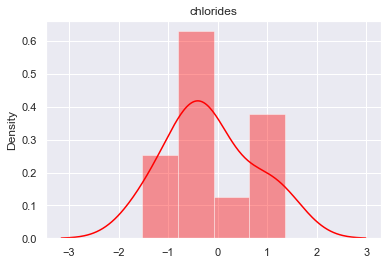

In [61]:
sns.distplot(x[4], color='red')
plt.title("chlorides")
plt.show()

#### performing the Standard Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

now we have done with scaling of the cols

#### Reducing the dimensions with PCA


In [63]:
from sklearn.decomposition import PCA

In [64]:
pca= PCA(n_components=4)
pca.fit(x)
x=pca.transform(x)
x.shape

(1451, 4)

In [65]:
x

array([[ 1.71155588e+00, -1.17175071e+00,  1.27881739e+00,
        -1.97314634e-03],
       [ 6.24701607e-01, -2.37211790e+00,  7.03970316e-02,
         6.69339018e-01],
       [ 5.74664889e-01, -1.57980052e+00,  5.06678468e-01,
         3.98496192e-01],
       ...,
       [ 1.57422441e+00,  1.54037557e-02, -1.60471085e+00,
         7.58678898e-01],
       [ 2.67688597e+00, -6.25632152e-01, -1.33139782e+00,
         4.49685693e-01],
       [ 4.57074753e-01,  9.22318803e-01, -1.96723924e+00,
         9.73413802e-01]])

#### Creating our Model for prediction:

In [66]:
#Importing some base models from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Splitting the Dataframe for the Training & Testing

In [67]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=48, test_size=0.20)
#so now our label data is balanced here

Using SVM

In [68]:
svc= SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test) 
print('this is the accuracy_score', accuracy_score(y_pred,y_test))
print('this is the confusion_matrix:', confusion_matrix(y_pred,y_test))
print('this is the classification_report', classification_report(y_pred,y_test))

this is the accuracy_score 0.6048109965635738
this is the confusion_matrix: [[  0   0   0   0   0]
 [  9 104  44   2   0]
 [  2  33  61  13   1]
 [  1   2   7  11   1]
 [  0   0   0   0   0]]
this is the classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.75      0.65      0.70       159
           6       0.54      0.55      0.55       110
           7       0.42      0.50      0.46        22
           8       0.00      0.00      0.00         0

    accuracy                           0.60       291
   macro avg       0.34      0.34      0.34       291
weighted avg       0.65      0.60      0.62       291



SVM accuracy score is : 0.6048109965635738


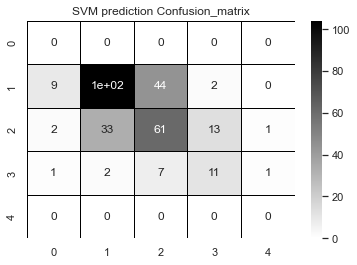

In [69]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, cmap='binary', linewidth=1, linecolor='black')
plt.title("SVM prediction Confusion_matrix")
print('SVM accuracy score is :', 0.6048109965635738)

#### Random Forest

In [70]:
rf= RandomForestClassifier(n_estimators=2000,criterion='gini',max_features=3, bootstrap=True , random_state=100)
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)
print('this is the accuracy_score', accuracy_score(rf_pred,y_test))
print('this is the confusion_matrix:', confusion_matrix(rf_pred,y_test))
print('this is the classification_report', classification_report(y_pred,y_test))

this is the accuracy_score 0.6907216494845361
this is the confusion_matrix: [[  0   0   1   0   0]
 [ 10 110  27   4   0]
 [  1  27  77   8   0]
 [  1   2   7  14   2]
 [  0   0   0   0   0]]
this is the classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.75      0.65      0.70       159
           6       0.54      0.55      0.55       110
           7       0.42      0.50      0.46        22
           8       0.00      0.00      0.00         0

    accuracy                           0.60       291
   macro avg       0.34      0.34      0.34       291
weighted avg       0.65      0.60      0.62       291



accuracy_score is : 0.6907216494845361


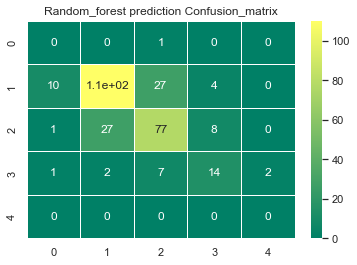

In [71]:
sns.heatmap(confusion_matrix(rf_pred,y_test), annot=True, cmap='summer', linewidth=1)
plt.title("Random_forest prediction Confusion_matrix")
print('accuracy_score is :' , 0.6907216494845361)

AdaBoost

In [72]:
ab = AdaBoostClassifier(n_estimators=1000,base_estimator=rf, learning_rate=0.001  ,random_state=96 )
ab.fit(x_train, y_train)
ab_pred= ab.predict(x_test)
print('this is the accuracy_score', accuracy_score(ab_pred,y_test))
print('this is the confusion_matrix:', confusion_matrix(ab_pred,y_test))
print('this is the classification_report',classification_report(ab_pred,y_test))

this is the accuracy_score 0.6941580756013745
this is the confusion_matrix: [[  1   0   1   0   0]
 [  9 112  28   3   0]
 [  1  25  76  10   0]
 [  1   2   7  13   2]
 [  0   0   0   0   0]]
this is the classification_report               precision    recall  f1-score   support

           4       0.08      0.50      0.14         2
           5       0.81      0.74      0.77       152
           6       0.68      0.68      0.68       112
           7       0.50      0.52      0.51        25
           8       0.00      0.00      0.00         0

    accuracy                           0.69       291
   macro avg       0.41      0.49      0.42       291
weighted avg       0.73      0.69      0.71       291



accuracy_score is : 0.6941580756013745


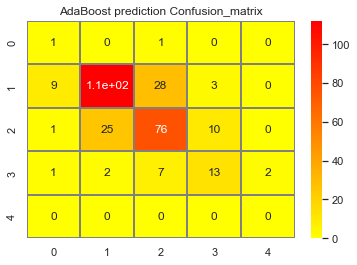

In [73]:
sns.heatmap(confusion_matrix(ab_pred,y_test), annot=True, cmap='autumn_r',linewidth=0.1, linecolor='grey')
plt.title("AdaBoost prediction Confusion_matrix")
print('accuracy_score is :' , 0.6941580756013745)

KNN (K_nearest_neighbors)

In [74]:
Kn = KNeighborsClassifier(n_neighbors=21)
Kn.fit(x_train,y_train)
Kn_pred= Kn.predict(x_test)
print('this is the accuracy_score', accuracy_score(Kn_pred,y_test))
print('this is the confusion_matrix:', confusion_matrix(Kn_pred,y_test))
print('this is the classification_report',classification_report(Kn_pred,y_test))

this is the accuracy_score 0.5738831615120275
this is the confusion_matrix: [[ 0  0  0  0  0]
 [ 9 97 43  1  0]
 [ 3 36 63 18  1]
 [ 0  6  6  7  1]
 [ 0  0  0  0  0]]
this is the classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.70      0.65      0.67       150
           6       0.56      0.52      0.54       121
           7       0.27      0.35      0.30        20
           8       0.00      0.00      0.00         0

    accuracy                           0.57       291
   macro avg       0.31      0.30      0.30       291
weighted avg       0.61      0.57      0.59       291



accuracy_score is : 0.570446735395189


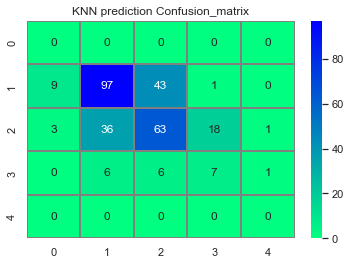

In [75]:
sns.heatmap(confusion_matrix(Kn_pred,y_test), annot=True, cmap='winter_r',linewidth=0.1, linecolor='grey')
plt.title("KNN prediction Confusion_matrix")
print('accuracy_score is :' , 0.570446735395189)

so from the all models we have got the best accuracy score out of Adaboostclassifier by using random forest
as its base_estimator so we can take Adaboost as our main model

#### fine Tuning Using Cross_validation:

In [76]:
pred_ab= ab.predict(x_test)
from sklearn.model_selection import cross_val_score
ab_score= accuracy_score(y_test, pred_ab)
for j in range(2,11):
    absscore= cross_val_score(ab,x,y,cv=j)
    abc= absscore.mean()
    print('at cv:',j)
    print('cross_validation_score is :',abc*100)
    print('Accuracy_score_is:',ab_score*100)
    print('\n')

at cv: 2
cross_validation_score is : 50.37912035717679
Accuracy_score_is: 69.41580756013745


at cv: 3
cross_validation_score is : 53.068231724358206
Accuracy_score_is: 69.41580756013745


at cv: 4
cross_validation_score is : 52.24266776250705
Accuracy_score_is: 69.41580756013745


at cv: 5
cross_validation_score is : 54.44744637990284
Accuracy_score_is: 69.41580756013745


at cv: 6
cross_validation_score is : 51.48428837602735
Accuracy_score_is: 69.41580756013745


at cv: 7
cross_validation_score is : 53.205791792748315
Accuracy_score_is: 69.41580756013745


at cv: 8
cross_validation_score is : 52.92863214133933
Accuracy_score_is: 69.41580756013745


at cv: 9
cross_validation_score is : 52.65785684465234
Accuracy_score_is: 69.41580756013745


at cv: 10
cross_validation_score is : 52.03731695795939
Accuracy_score_is: 69.41580756013745




since we have not got much good score with the cross_validation thus we will now go for Hypertuning

As we have tried doing the tuning and hypertuning but since the model doesnot gave better result thus we are taking our base model as Adaboost we have a accuracy of 0.6941580756013745

#### Roc_auc score for evaluation of our model

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
ab_pred_proba= ab.predict_proba(x_test)

In [79]:
roc_auc_score(y_test, ab_pred_proba,multi_class='ovr')

0.8399337736635877

Thus the score here is 83% which is good overall

##### Model Saving in system

In [80]:
import pickle
filename = 'red_wine_model'
pickle.dump(ab, open(filename, 'wb'))

#### Conclsion prediction by the Model


In [81]:
a = np.array(y_test)
predicted = np.array(ab.predict(x_test))
df_wine = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_wine

,orginal,predicted
0,6,6
1,7,5
2,5,6
3,6,6
4,6,6
...,...,...
286,5,5
287,5,6
288,6,6
289,5,5
